<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JulioperezA01793880/blob/main/Dataanalisis_modulo_4_Julio_perez_A01793880.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Julio Cesar Perez Zapata
Matricula:
l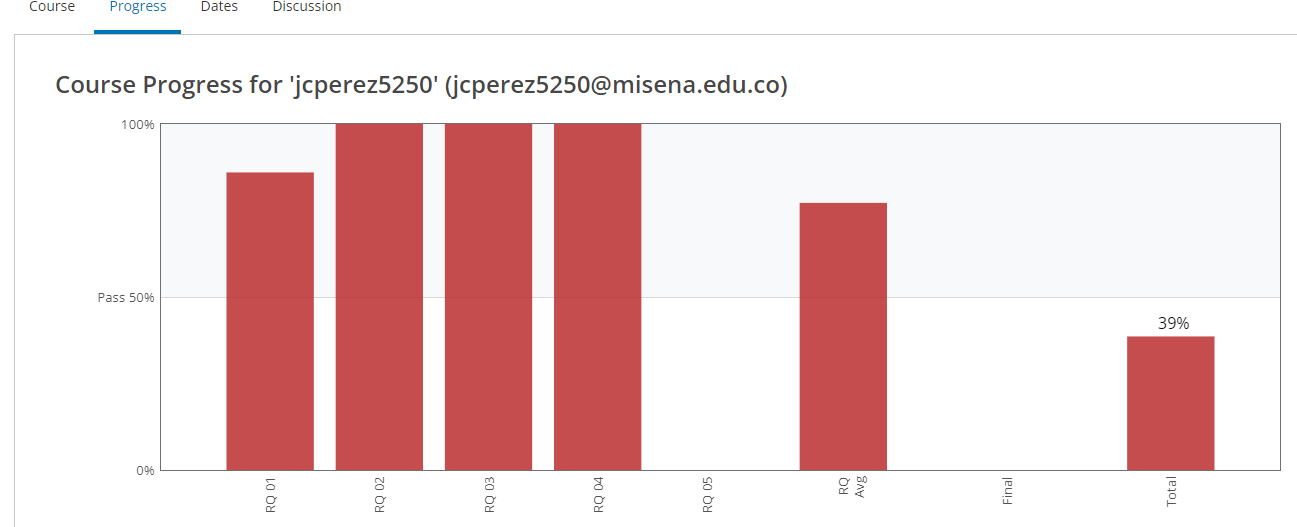

In [4]:
import pandas as pd  # importamos las librerias necesarias para realoizar el laboratorio y la libreria para graficar
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [1]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [3]:
df = pd.read_csv(path) # cargamos el datast en df e imprimimos las 5 primeras filas
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
lm = LinearRegression()  # llamamos el modelo a utilizar
lm

LinearRegression()

In [6]:
X = df[['highway-mpg']] # selecionamos las variables que nos ayudaran a predicir el precio, para este ejemplo se utiliza la variable 'highway-mpg' como entrada y la variable prie como salida
Y = df['price']

In [7]:
lm.fit(X,Y)  # entrenamos el modelo

LinearRegression()

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
lm.intercept_

38423.3058581574

In [10]:
lm.coef_

array([-821.73337832])

In [11]:
# el primer laboratorio es traer un modelo de regresion lineal que se llame lm1
lm1 = LinearRegression()
lm1

LinearRegression()

In [12]:
#entrenamos el modelo con las variable engine-size y price
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [17]:
# encontar la pendiente
lm1.coef_


array([[166.86001569]])

In [16]:
# encontrar la intercepcion
lm1.intercept_

array([-7963.33890628])

In [15]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

In [18]:
#modelo con varias variables de entrada
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [19]:
lm.fit(Z, df['price'])

LinearRegression()

In [21]:
lm.intercept_

-15806.62462632922

In [22]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [24]:
# Cree y entrene un modelo de regresión lineal múltiple "lm2" en el que la variable de respuesta sea "precio" y la variable de predicción sea "pérdidas normalizadas" y "mpg en carretera".
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [25]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [26]:
import seaborn as sns
%matplotlib inline 

(0.0, 48186.907296066514)

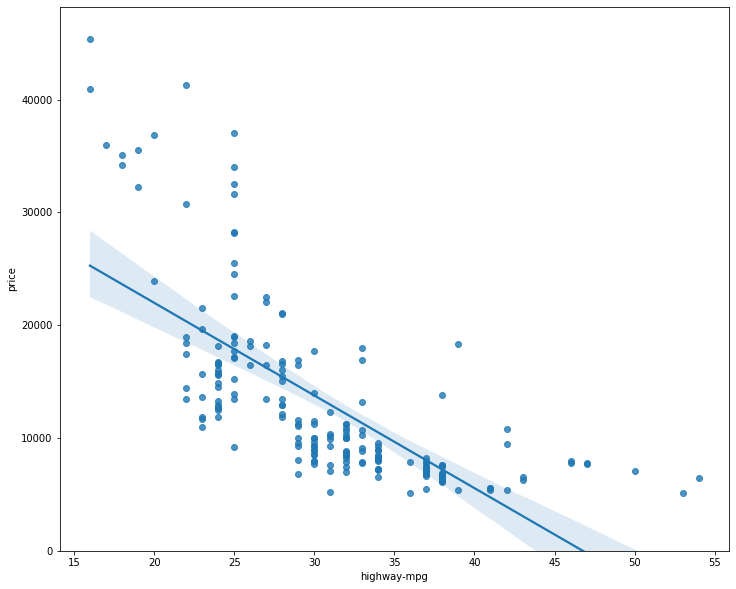

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

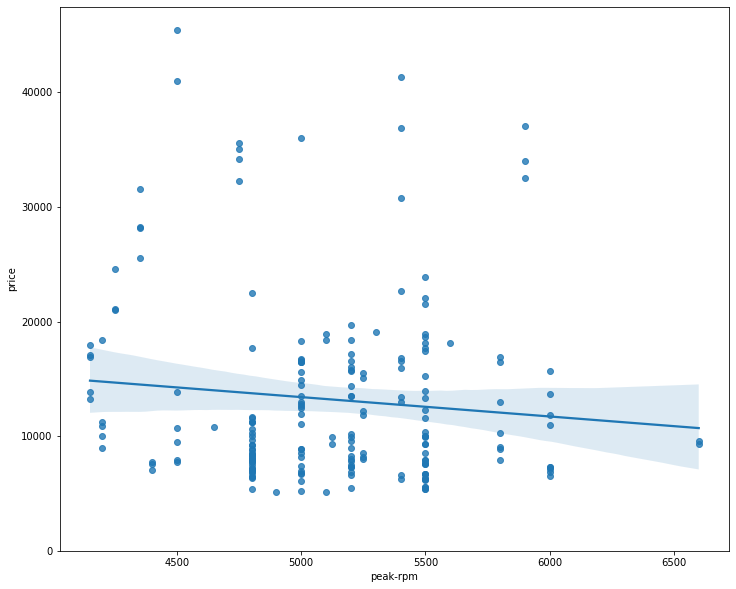

In [28]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [29]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


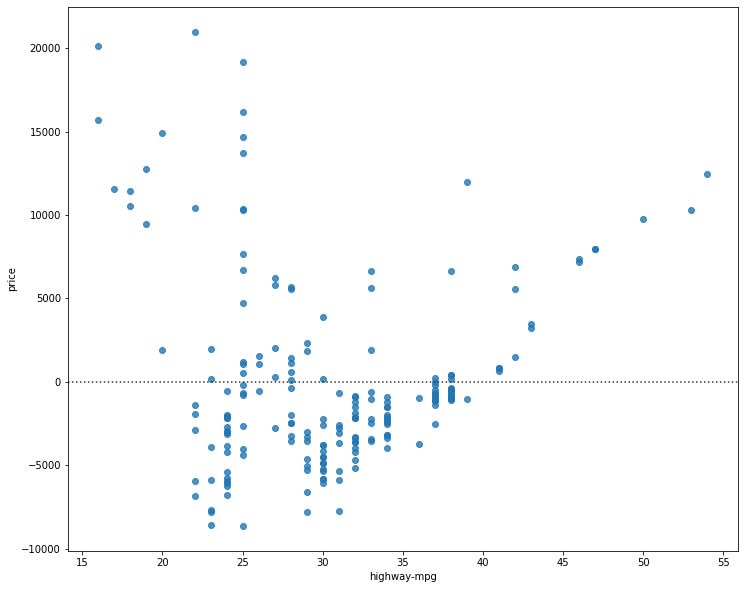

In [30]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [31]:
Y_hat = lm.predict(Z)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


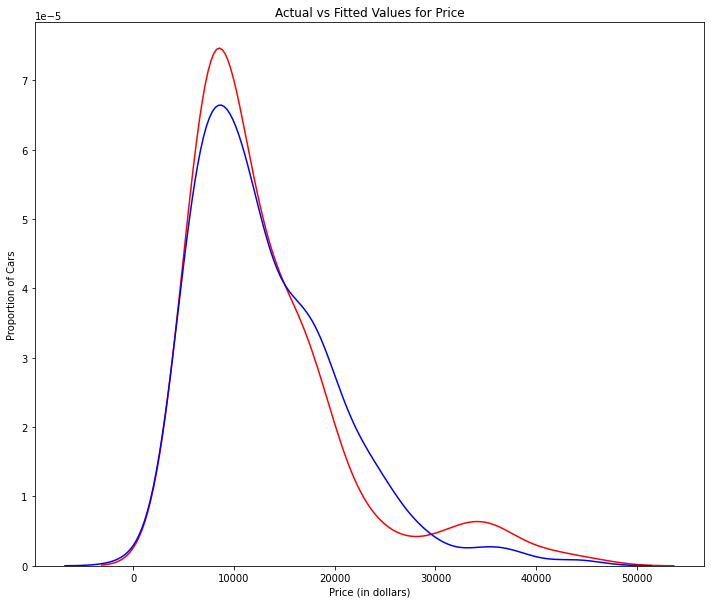

In [32]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [34]:
x = df['highway-mpg']
y = df['price']

In [35]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


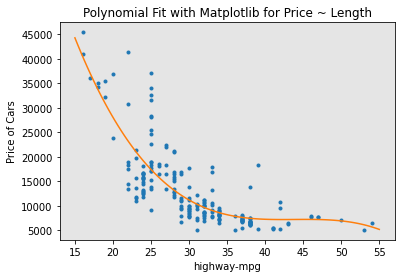

In [36]:
PlotPolly(p, x, y, 'highway-mpg')

In [37]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


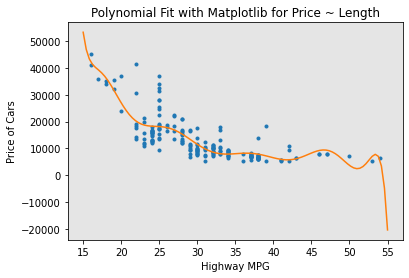

In [38]:
#Cree un modelo polinomial de 11 órdenes con las variables x e y de arriba.
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


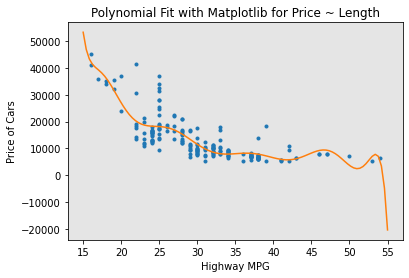

In [39]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [42]:
Z_pr=pr.fit_transform(Z)

In [43]:
Z.shape

(201, 4)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [46]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [47]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [48]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [50]:
#Cree una canalización que estandarice los datos, luego produzca una predicción usando un modelo de regresión lineal usando las características Z y el objetivo y.
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])